In [1]:
# required libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

In [3]:
# handling data

from sklearn.cross_validation import train_test_split
dataset = pd.read_csv('F:\CV\website.csv',usecols = ['age' , 'number of visits' , 'decision' ] )
indepX = dataset.iloc[:,[0,1]].values.astype(float)
depY = dataset.iloc[:,2].values
indepX_train , indepX_test  , depY_train  , depY_test = train_test_split( indepX , depY , test_size = .25  )

dataset.head(5)

,age,number of visits,decision
0,15,60,1
1,16,63,1
2,15,72,1
3,15,83,1
4,17,84,1


In [4]:
# Generating Model

from sklearn.ensemble import RandomForestClassifier
Random_Forest = RandomForestClassifier(criterion = 'entropy' ,n_estimators =5 ,
n_jobs = 2, random_state=0 , max_depth = 7 , min_samples_split = 7  )
RF = Random_Forest.fit(indepX_train, depY_train) 
depY_train_pred = Random_Forest.predict(indepX_train) 
depY_test_pred = Random_Forest.predict(indepX_test)


In [5]:
# SVM model result
print ( (  depY_train_pred == depY_train).sum() , depY_train.shape[0]   )
print ( (depY_test_pred  ==   depY_test).sum()  , depY_test.shape[0]    )

422 462
135 154


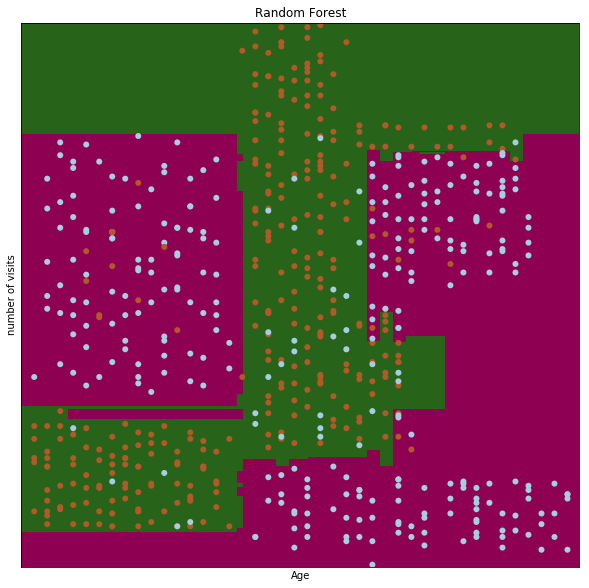

In [6]:
# visualization

plt.figure(figsize=(10 , 10 ))
h = .1 
x_min, x_max = indepX[:, 0].min() - 1, indepX[:, 0].max() + 1
y_min, y_max = indepX[:, 1].min() - 1, indepX[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max,h))
Z = Random_Forest.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap='PiYG')
plt.scatter(indepX[:, 0], indepX[:, 1], c=depY, edgecolors='m', linewidth=0, cmap=plt.cm.Paired)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Random Forest", fontsize='large')
plt.xlabel('Age')
plt.ylabel('number of visits')
plt.xticks(())
plt.yticks(())
plt.show()
